In [1]:
#import inline as inline
import matplotlib
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
import cv2
#import matplotlib.image as mpimg
#from PIL import Image as pil_image
import image as pil_image
import matplotlib.pyplot as plt
%matplotlib inline
#get_ipython().run_line_magic('matplotlib', 'inline')
from keras import backend as K
import tensorflow as tf
from skimage.color import rgb2gray
from scipy import ndimage
from tkinter import *
from tkinter import ttk
from scipy import ndimage
from tkinter import filedialog

Using TensorFlow backend.


In [2]:
from keras.preprocessing.image import ImageDataGenerator

In [3]:
image_gen = ImageDataGenerator(rotation_range=30,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              rescale=1/255,
                              shear_range=0.2,
                              zoom_range=0.2,
                              horizontal_flip=True,
                              fill_mode='nearest')

In [4]:
image_shape=(150, 150, 3)

In [5]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [6]:
model = Sequential()


model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(150, 150, 3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(150, 150, 3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(150, 150, 3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
             optimizer='Adam',
             metrics=['accuracy'])




In [7]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18496)            

In [8]:
batch_size=5

train_image_gen=image_gen.flow_from_directory('C:\\pushkara_files\\dataset-teeth\\Trianing',
                                             target_size=image_shape[:2],
                                             batch_size=batch_size,
                                             class_mode='binary')

Found 58 images belonging to 2 classes.


In [9]:
test_image_gen=image_gen.flow_from_directory('C:\\pushkara_files\\dataset-teeth\\test',
                                             target_size=image_shape[:2],
                                             batch_size=batch_size,
                                             class_mode='binary')

Found 16 images belonging to 2 classes.


In [10]:
train_image_gen.class_indices

{'caries': 0, 'without_caries': 1}

In [11]:
import warnings
warnings.filterwarnings('ignore')

In [15]:
results = model.fit_generator(train_image_gen,
                              epochs=30,
                             steps_per_epoch=20,
                             validation_data=test_image_gen,
                             validation_steps=12)


Epoch 1/30
20/20 [==============================] - 3s 147ms/step - loss: 0.3377 - accuracy: 0.8333 - val_loss: 9.0926e-18 - val_accuracy: 0.7500
Epoch 2/30
20/20 [==============================] - 3s 125ms/step - loss: 0.2723 - accuracy: 0.8469 - val_loss: 3.0944e-18 - val_accuracy: 0.8958
Epoch 3/30
20/20 [==============================] - 2s 115ms/step - loss: 0.3109 - accuracy: 0.8750 - val_loss: 0.0032 - val_accuracy: 0.7292
Epoch 4/30
20/20 [==============================] - 2s 125ms/step - loss: 0.3698 - accuracy: 0.8229 - val_loss: 5.2697e-08 - val_accuracy: 0.6458
Epoch 5/30
20/20 [==============================] - 2s 116ms/step - loss: 0.3315 - accuracy: 0.8229 - val_loss: 0.1190 - val_accuracy: 0.6875
Epoch 6/30
20/20 [==============================] - 3s 128ms/step - loss: 0.3375 - accuracy: 0.8571 - val_loss: 0.0000e+00 - val_accuracy: 0.7917
Epoch 7/30
20/20 [==============================] - 3s 141ms/step - loss: 0.2696 - accuracy: 0.8542 - val_loss: 7.5537e-17 - val_acc

cavity infected tooth


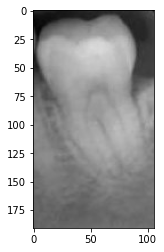

cavity infected tooth


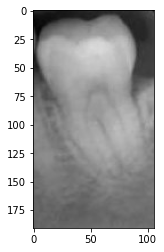

In [20]:
class Root(Tk):
    def __init__(self):
        super(Root, self).__init__()
        self.title("")
        self.minsize(600, 400)
        #self.wm_iconbitmap('icon.ico')
        
        self.labelFrame=ttk.LabelFrame(self, text="browse a image")
        self.labelFrame.grid(column = 0, row = 1, padx = 20, pady = 20)
        self.button()
        
        
    def button(self):
        self.button = ttk.Button(self.labelFrame, text = "browse", command = self.fileDialog)
        self.button.grid(column=1, row=1)
        
        
    def fileDialog(self):
        self.filename = filedialog.askopenfilename(initialdir = "/", title = "select a Image", filetype = (("jpeg", "*.jpg"), ("All Files", "*.*")))
        def classifier(path):
            raw_img = image.load_img(path, target_size=(150, 150))
            raw_img = image.img_to_array(raw_img)
            raw_img = np.expand_dims(raw_img, axis=0)
            raw_img = raw_img / 255
            prediction = model.predict_classes(raw_img)[0][0]
            plt.imshow(cv2.imread(path))
            if prediction:
                print("Healthy tooth")
            else:
                print("cavity infected tooth")
     
            plt.show()

        classifier(self.filename)

if __name__ == '__main__':
    root = Root()
    root.mainloop()

==================Image Denoise===============


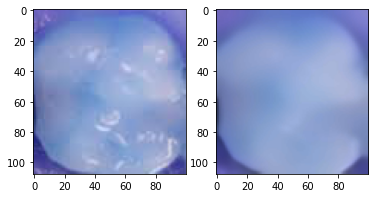

===============Image Smoothing==========


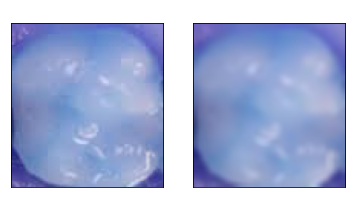

NameError: name 'gray' is not defined

In [17]:
from skimage.color import rgb2gray
from scipy import ndimage

img = cv2.imread('C:\\pushkara_files\\dataset-teeth\\test\\no-caries\\nc1.jpg')
dst = cv2.fastNlMeansDenoisingColored(img,None,10,10,7,21)

plt.subplot(121),plt.imshow(img)
plt.subplot(122),plt.imshow(dst)
print("==================Image Denoise===============")
plt.show()
print("==============================================")



blur = cv2.blur(img,(5,5))

plt.subplot(121),plt.imshow(img),plt.title('  ')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title(' ')
plt.xticks([]), plt.yticks([])
print("===============Image Smoothing==========")
plt.show()
print("==============================================")

gray_r = gray.reshape(gray.shape[0]*gray.shape[1])
for i in range(gray_r.shape[0]):
    if gray_r[i] > gray_r.mean():
        gray_r[i] = 1
    else:
        gray_r[i] = 0
gray = gray_r.reshape(gray.shape[0],gray.shape[1])
print("===============Image Segmentation=============")
plt.imshow(gray, cmap='gray')
print("==============================================")
            


In [1]:
from skimage.color import rgb2gray
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import ndimage

In [2]:
gray_r = gray.reshape(gray.shape[0]*gray.shape[1])
for i in range(gray_r.shape[0]):
    if gray_r[i] > gray_r.mean():
        gray_r[i] = 1
    else:
        gray_r[i] = 0
gray = gray_r.reshape(gray.shape[0],gray.shape[1])
plt.imshow(gray, cmap='gray')

NameError: name 'gray' is not defined

In [4]:
gray = rgb2gray(image)
plt.imshow(gray, cmap='gray')

NameError: name 'image' is not defined